# Assignment 1 - Simplified Custom Object Detection

This notebook contains the required task for the first assignment of the Deep Network Development course. Read the task description and fill in the empty code cells. Each section represents an implementation stage of object detection: -from loading and inspecting the dataset; -to implementing, training and evaluating a Convolutional Neural Network based architecture. The sections are there to guide you but you do not have to follow them strictly.

Copy this notebook to your drive (File -> Save a copy in Drive), edit it, and upload the final .ipynb file to [Canvas](https://canvas.elte.hu). If you are using this in Google Colab notebook, save it as .ipynb and upload it, or share the public link. If you have your own machine with Jupyter installed, you can work there as well, as long as you save and upload the .ipynb file.


## General Rules
Please check all the requirements listed on Canvas, but here are some general rules:
- From the list of objects provided, please pick at least 3 objects. You may pick more, but less than 3 is not acceptable and results in losing points;
- While we do not require a high performance model, we still expect you to have a model that performs better than "random guessing" (i.e. for 3 objects, mAP should be better than 33%);
- Copying others' code will make you fail the assignment automatically, resulting in a 0;
- Not submitting anything results in a 0;
- Submitting something, as long as it is not an empty notebook, might result in a 1;
- **Deadline is April 21st Sunday 11:59 PM** (strict, no late submission)
- Feel free to add more code cells as needed. But don't put code into external Python files.
- Please add your name, Neptun ID, and task details below.

**Name:**  ZINGA BANDA FIRMINO RENÉ
**Neptun ID:** GAA4QU
**Network:**
**Objects:**

## Task description

Your task is to train your own custom object detection model and compare its performance with an existing object detection model (i.e. YOLO). For that, you need to generate a synthetic dataset to train your own custom model and fine-tune an existing one. This is a simplified version of object detection, where each image must only contain a single object.
There is no expected high performance, but **your metrics should show results better than random guessing and your loss has to decrease throughout the epochs**. We expect you to show visualizations (matplotlib, seaborn, ...) of the metrics, losses, and predictions. Use techniques to avoid overfitting such as Early stopping, and more, and save the best model while training your network.

**In order to get your grade for the assignment, you must defend it by answering questions during the designated practice time.**

## Guidelines
Please carefully read each cell of the notebook, as they contain guidelines to help you complete the assignments. While you don't have to follow them strictly, we believe that they provide enough help.

# 0. Necessary Imports
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [1]:
!pip install ultralytics

from ultralytics import YOLO

import torch
import torchvision
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

%matplotlib inline

import shutil
import time
import copy
from typing import List

%matplotlib inline
from typing import List

import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

from IPython.display import Image, display
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. DATASET
For this assignment you will be using at least 3 of the [Mihály Kolodko's Mini Statues](https://www.atlasobscura.com/places/hidden-mini-statues-of-budapest).

You can find all of the objects seperately in a folder here: [Objects](https://drive.google.com/drive/folders/1QEEHye66USSWesGSVBQw1v1tk3Hr01G9?usp=sharing)

<img src='https://www.goethe.de/resources/files/jpg1201/161kolodkovojenyjkorabel-formatkey-jpg-w1920.jpg' />

#### **1.2. Show some annotations of your dataset**


### 1.1. Load objects



**Please select 3 or more objects.** Upon selecting the objects, **please remove the background, so that only the object is kept**. You can do it manually, online or by code (this is not part of the evaluation of your assignment).
As an example, the following objects have been chosen (the background was removed with Segment Anything Model):

In [4]:
# ADD YOUR CODE HERE
!pip install removebg
!pip install matplotlib
from removebg import RemoveBg
import os

# Sua chave de API
sua_chave_api = "K9DLjKfWCJsnpWtMePhxce71"

# Criar uma instância de RemoveBg com sua chave de API
rmbg = RemoveBg(sua_chave_api, "error.log")

# Caminho para a imagem da qual você quer remover o fundo
caminho_imagem1 = "/content/drive/MyDrive/First_DND_Ass.2024/objects/Checkered_Ear_Rabbit.jpg"
caminho_imagem2 = "/content/drive/MyDrive/First_DND_Ass.2024/objects/Diver.jpg"
caminho_imagem3 = "/content/drive/MyDrive/First_DND_Ass.2024/objects/Liszt.jpg"
caminho_imagem4 = "/content/drive/MyDrive/First_DND_Ass.2024/objects/Rubiks_Cube.jpg"
# Remover o fundo e salvar a imagem resultante
rmbg.remove_background_from_img_file(caminho_imagem1)
rmbg.remove_background_from_img_file(caminho_imagem2)
rmbg.remove_background_from_img_file(caminho_imagem3)
rmbg.remove_background_from_img_file(caminho_imagem4)

# O arquivo resultante será salvo no mesmo diretório da imagem original com um sufixo "_no_bg".


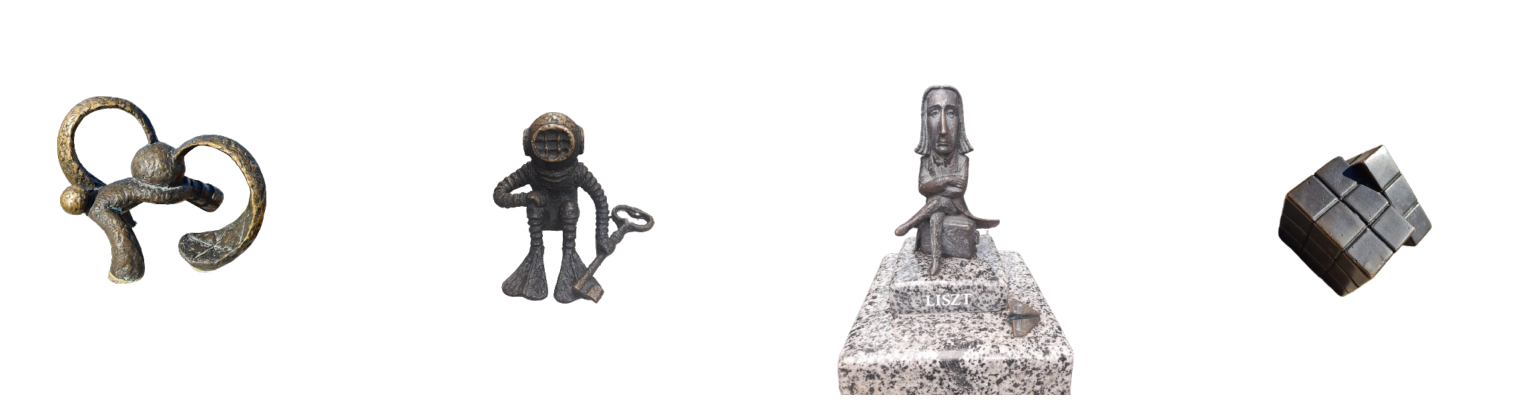

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Caminho para a imagem salva
caminho_imagem1 = "/content/drive/MyDrive/First_DND_Ass.2024/objects/Checkered_Ear_Rabbit.jpg_no_bg.png"
caminho_imagem2 = "/content/drive/MyDrive/First_DND_Ass.2024/objects/Diver.jpg_no_bg.png"
caminho_imagem3 = "/content/drive/MyDrive/First_DND_Ass.2024/objects/Liszt.jpg_no_bg.png"
caminho_imagem4 = "/content/drive/MyDrive/First_DND_Ass.2024/objects/Rubiks_Cube.jpg_no_bg.png"

# Criar uma figura para conter os subplots
plt.figure(figsize=(20, 5))  # Ajuste o tamanho conforme necessário

# Imagem 1
ax1 = plt.subplot(1, 4, 1)  # 1 linha, 4 colunas, posição 1
img = mpimg.imread(caminho_imagem1)
ax1.imshow(img)
ax1.axis('off')  # Remover os eixos

# Imagem 2
ax2 = plt.subplot(1, 4, 2, sharex=ax1, sharey=ax1)  # Compartilhar eixos com ax1
img = mpimg.imread(caminho_imagem2)
ax2.imshow(img)
ax2.axis('off')

# Imagem 3
ax3 = plt.subplot(1, 4, 3, sharex=ax1, sharey=ax1)  # Compartilhar eixos com ax1
img = mpimg.imread(caminho_imagem3)
ax3.imshow(img)
ax3.axis('off')

# Imagem 4
ax4 = plt.subplot(1, 4, 4, sharex=ax1, sharey=ax1)  # Compartilhar eixos com ax1
img = mpimg.imread(caminho_imagem4)
ax4.imshow(img)
ax4.axis('off')

plt.show()  # Exibir a figura com todas as imagens

#### **1.2. Show some images and annotations of your dataset**

In [6]:
from torch.utils.data import Dataset
from torchvision import transforms
import os
from PIL import Image
import matplotlib.pyplot as plt  # Certifique-se de importar plt para usar plt.imshow

class CustomDataset(Dataset):
    def __init__(self, root, annotation_file, transform=None):
        self.root = root
        self.transform = transform
        with open(annotation_file, 'r') as f:
            self.img_labels = [line.strip().split() for line in f]

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # Assume que o caminho já está completo no arquivo de anotações
        img_path = os.path.join(self.root, self.img_labels[idx][0])
        image = Image.open(img_path).convert("RGB")
        label = int(self.img_labels[idx][1])

        if self.transform:
            image = self.transform(image)

        return image, label

# Caminhos para o diretório de imagens e arquivo de anotações
img_path = '/data'
path_ann = 'train.txt'

# Criando o conjunto de dados personalizado
transform = transforms.ToTensor()  # Adapte as transformações conforme necessário
custom_dataset = CustomDataset(root=img_path, annotation_file=path_ann, transform=transform)

# Exibindo informações sobre o conjunto de dados
print(f'Number of samples: {len(custom_dataset)}')

# Exibindo as três primeiras imagens com seus rótulos
for i in range(3):
    sample, label = custom_dataset[i]
    print(f"Sample {i + 1} - Shape: {sample.shape}, Label: {label}")

    # Exibindo a imagem
    plt.imshow(sample.permute(1, 2, 0))  # Ajuste as dimensões para a exibição
    plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'train.txt'

In [ ]:
from torch.utils.data import Dataset
from torchvision import transforms
import os
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, root, annotation_file, transform=None):
        # Armazenar o caminho para as imagens, arquivo de anotação e transformações
        self.root = root
        self.transform = transform
        with open(annotation_file, 'r') as f:
            self.img_labels = [line.strip().split() for line in f]

    def __len__(self):
        # Retorna o tamanho do dataset
        return len(self.img_labels)

    def __getitem__(self, idx):
        # Carregar uma imagem e sua etiqueta pelo idx
        img_path = os.path.join(self.root, self.img_labels[idx][0])
        image = Image.open(img_path).convert("RGB")
        label = int(self.img_labels[idx][1])

        if self.transform:
            image = self.transform(image)

        return image, label

# Após definir a classe, você pode usá-la assim:
path_img = '/data/obj_train_data'
path_ann = 'train.txt'
transform = transforms.ToTensor()
custom_dataset = CustomDataset(root=path_img, annotation_file=path_ann, transform=transform)
from torch.utils.data import Dataset
from torchvision import transforms
import os
from PIL import Image

class CustomDataset(Dataset):
    def __init__(self, root, annotation_file, transform=None):
        # Armazenar o caminho para as imagens, arquivo de anotação e transformações
        self.root = root
        self.transform = transform
        with open(annotation_file, 'r') as f:
            self.img_labels = [line.strip().split() for line in f]

    def __len__(self):
        # Retorna o tamanho do dataset
        return len(self.img_labels)

    def __getitem__(self, idx):
        # Carregar uma imagem e sua etiqueta pelo idx
        img_path = os.path.join(self.root, self.img_labels[idx][0])
        image = Image.open(img_path).convert("RGB")
        label = int(self.img_labels[idx][1])

        if self.transform:
            image = self.transform(image)

        return image, label

# Após definir a classe, você pode usá-la assim:
path_img = '/data/obj_train_data'
path_ann = 'train.txt'
transform = transforms.ToTensor()
custom_dataset = CustomDataset(root=path_img, annotation_file=path_ann, transform=transform)




FileNotFoundError: [Errno 2] No such file or directory: 'train.txt'

In [ ]:
# Exibindo informações sobre o conjunto de dados
print(f'Number of samples: {len(custom_dataset)}')

# Exibindo as três primeiras imagens com seus rótulos
for i in range(3):
    sample, label = custom_dataset[i]
    print(f"Sample {i + 1} - Shape: {sample.shape}, Label: {label}")

    # Exibindo a imagem
    plt.imshow(sample.permute(1, 2, 0))  # Ajuste as dimensões para a exibição
    plt.show()

Number of samples: 336


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/First_DND_Ass.2024/data/data/obj_train_data/data/obj_train_data/Checkered_Ear_Rabbit_istockphoto-108226233-612x612.jpg'

#### **1.3. Pre-processing the dataset**

In [ ]:

class CustomDataset(Dataset):
    def __init__(self, root, annotation_file, transform=None):
        self.root = root
        self.transform = transform

        # Carregando informações do arquivo de anotações
        with open(annotation_file, 'r') as f:
            self.annotations = f.readlines()

        # Inicializando um dicionário para contar as classes
        self.class_counts = {}

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path, label = self.annotations[idx].strip().split()  # Remover espaços em branco e obter o rótulo
        img = Image.open(img_path).convert("RGB")

        if self.transform:
            img = self.transform(img)

        # Atualizando a contagem de classes
        if label in self.class_counts:
            self.class_counts[label] += 1
        else:
            self.class_counts[label] = 1

        return img

# Caminhos para o diretório de imagens e arquivo de anotações
path_img = '/content/drive/MyDrive/Ass/data/labels/train'
path_ann = '/content/drive/MyDrive/Ass/data/labels/train/train.txt'

# Definindo transformações
transform = transforms.Compose([
    transforms.Resize((416, 416)),  # Redimensiona a imagem para o tamanho esperado pelo modelo
    transforms.ToTensor(),            # Converte a imagem para um tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normaliza os valores dos pixels
])

# Criando o conjunto de dados personalizado
custom_dataset = CustomDataset(root=path_img, annotation_file=path_ann, transform=transform)

# Exibindo informações sobre o conjunto de dados
print(f'Number of samples: {len(custom_dataset)}')



Number of samples: 80


In [ ]:

class CustomDataset(Dataset):
    def __init__(self, root, annotation_file, transform=None):
        self.root = root
        self.transform = transform

        # Carregando informações do arquivo de anotações
        with open(annotation_file, 'r') as f:
            self.annotations = f.readlines()

        # Inicializando um dicionário para contar as classes
        self.class_counts = {}

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path, label = self.annotations[idx].strip().split()  # Remover espaços em branco e obter o rótulo
        img = Image.open(img_path).convert("RGB")

        if self.transform:
            img = self.transform(img)

        # Atualizando a contagem de classes, iniciando em 1
        if label in self.class_counts:
            self.class_counts[label] += 2  # Incrementa em 2, garantindo que comece em 1
        else:
            self.class_counts[label] = 1

        return img

# Caminhos para o diretório de imagens e arquivo de anotações
path_img = '/content/drive/MyDrive/Ass/data/labels/train'
path_ann = '/content/drive/MyDrive/Ass/data/labels/train/train.txt'

# Definindo transformações
transform = transforms.Compose([
    transforms.Resize((416, 416)),  # Redimensiona a imagem para o tamanho esperado pelo modelo
    transforms.ToTensor(),            # Converte a imagem para um tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normaliza os valores dos pixels
])

# Criando o conjunto de dados personalizado
custom_dataset = CustomDataset(root=path_img, annotation_file=path_ann, transform=transform)

# Exibindo informações sobre o conjunto de dados
print(f'Number of samples: {len(custom_dataset)}')

# Exibindo a contagem de classes
print('Class Counts:')
for class_label, count in custom_dataset.class_counts.items():
    print(f'Class {class_label}: {count} samples')


Number of samples: 80
Class Counts:


## **2. Models**

#### **2.1. Load the models**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Supondo que você tenha treinado o modelo e deseje salvá-lo
# Certifique-se de substituir "nome_do_modelo.pth" pelo nome desejado para o arquivo de salvamento

# Salvar o estado do modelo (pesos e outros parâmetros)
#torch.save(model.state_dict(), "yolov8n.pth")

# Salvar o modelo completo, incluindo a arquitetura
#torch.save(model, "nome_do_modelo_completo.pth")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f  


Replace the model input parameters according to the configuration, adjusting the 'CustomDataset' class to accept these parameters and then use them in the '__getitem__' method.

In [ ]:


class CustomDataset(Dataset):
    def __init__(self, root, annotation_file, transform=None, model_input_size=(416, 416)):
        self.root = root
        self.transform = transform
        self.model_input_size = model_input_size  # Adicionando o tamanho esperado pelo modelo

        # Carregando informações do arquivo de anotações
        with open(annotation_file, 'r') as f:
            self.annotations = f.readlines()

        # Inicializando um dicionário para contar as classes
        self.class_counts = {}

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path, label = self.annotations[idx].strip().split()  # Remover espaços em branco e obter o rótulo
        img = Image.open(img_path).convert("RGB")

        if self.transform:
            img = self.transform(img)

        # Redimensionando a imagem para o tamanho esperado pelo modelo
        img = transforms.Resize(self.model_input_size)(img)

        # Atualizando a contagem de classes, iniciando em 1
        if label in self.class_counts:
            self.class_counts[label] += 2  # Incrementa em 2, garantindo que comece em 1
        else:
            self.class_counts[label] = 1

        return img

# Restante do código permanece o mesmo

# Definindo o tamanho de entrada esperado pelo modelo
model_input_size = (416, 416)

# Criando o conjunto de dados personalizado com o tamanho esperado pelo modelo
custom_dataset = CustomDataset(root=path_img, annotation_file=path_ann, transform=transform, model_input_size=model_input_size)

# Restante do código permanece o mesmo


#### **2.2. Show the architectures**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from torchsummary import summary

model = YOLO("yolov8n.yaml")  # Carregue o modelo a partir do arquivo YAML

#model = YOLO("/content/drive/MyDrive/Ass/config.yaml", task='detect')  # Crie um novo modelo com configurações diferentes

# Mostre a arquitetura do modelo
#summary(model, input_size=(3, 416, 416))  # Substitua as dimensões de entrada conforme necessário

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f  

## **3. Evaluation**
This is the most important part. Please give a detailed comparison between the models.

**Implement your metrics manually**. Do not use pre defined Pytorch metrics.

Calculate the metrics for each model on the test set.

Plot the metrics.

Show some predictions in comparison to the ground truth.





In [ ]:
# Use the model
model.train(data="/content/drive/MyDrive/Ass/config.yaml", epochs=3)

Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Ass/config.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=F

100%|██████████| 755k/755k [00:00<00:00, 11.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/drive/MyDrive/Ass/data/labels/train.cache... 80 images, 0 backgrounds, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Ass/data/labels/val.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]

Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G      3.014      3.611      4.264         41        640: 100%|██████████| 5/5 [01:12<00:00, 14.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:15<00:00, 15.11s/it]

                   all         20         20    0.00317       0.95     0.0221    0.00822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G      3.165      3.512      4.242         43        640: 100%|██████████| 5/5 [01:03<00:00, 12.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.36s/it]

                   all         20         20    0.00317       0.95      0.047      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G      3.179      3.561      4.219         40        640: 100%|██████████| 5/5 [01:04<00:00, 12.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  5.00s/it]

                   all         20         20    0.00317       0.95     0.0769     0.0209



3 epochs completed in 0.065 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.215 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.78s/it]


                   all         20         20    0.00317       0.95     0.0549      0.018
Speed: 2.5ms preprocess, 267.0ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7da059551b70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## 4. **Visualize results**




**4.1. Implement your metrics manually**

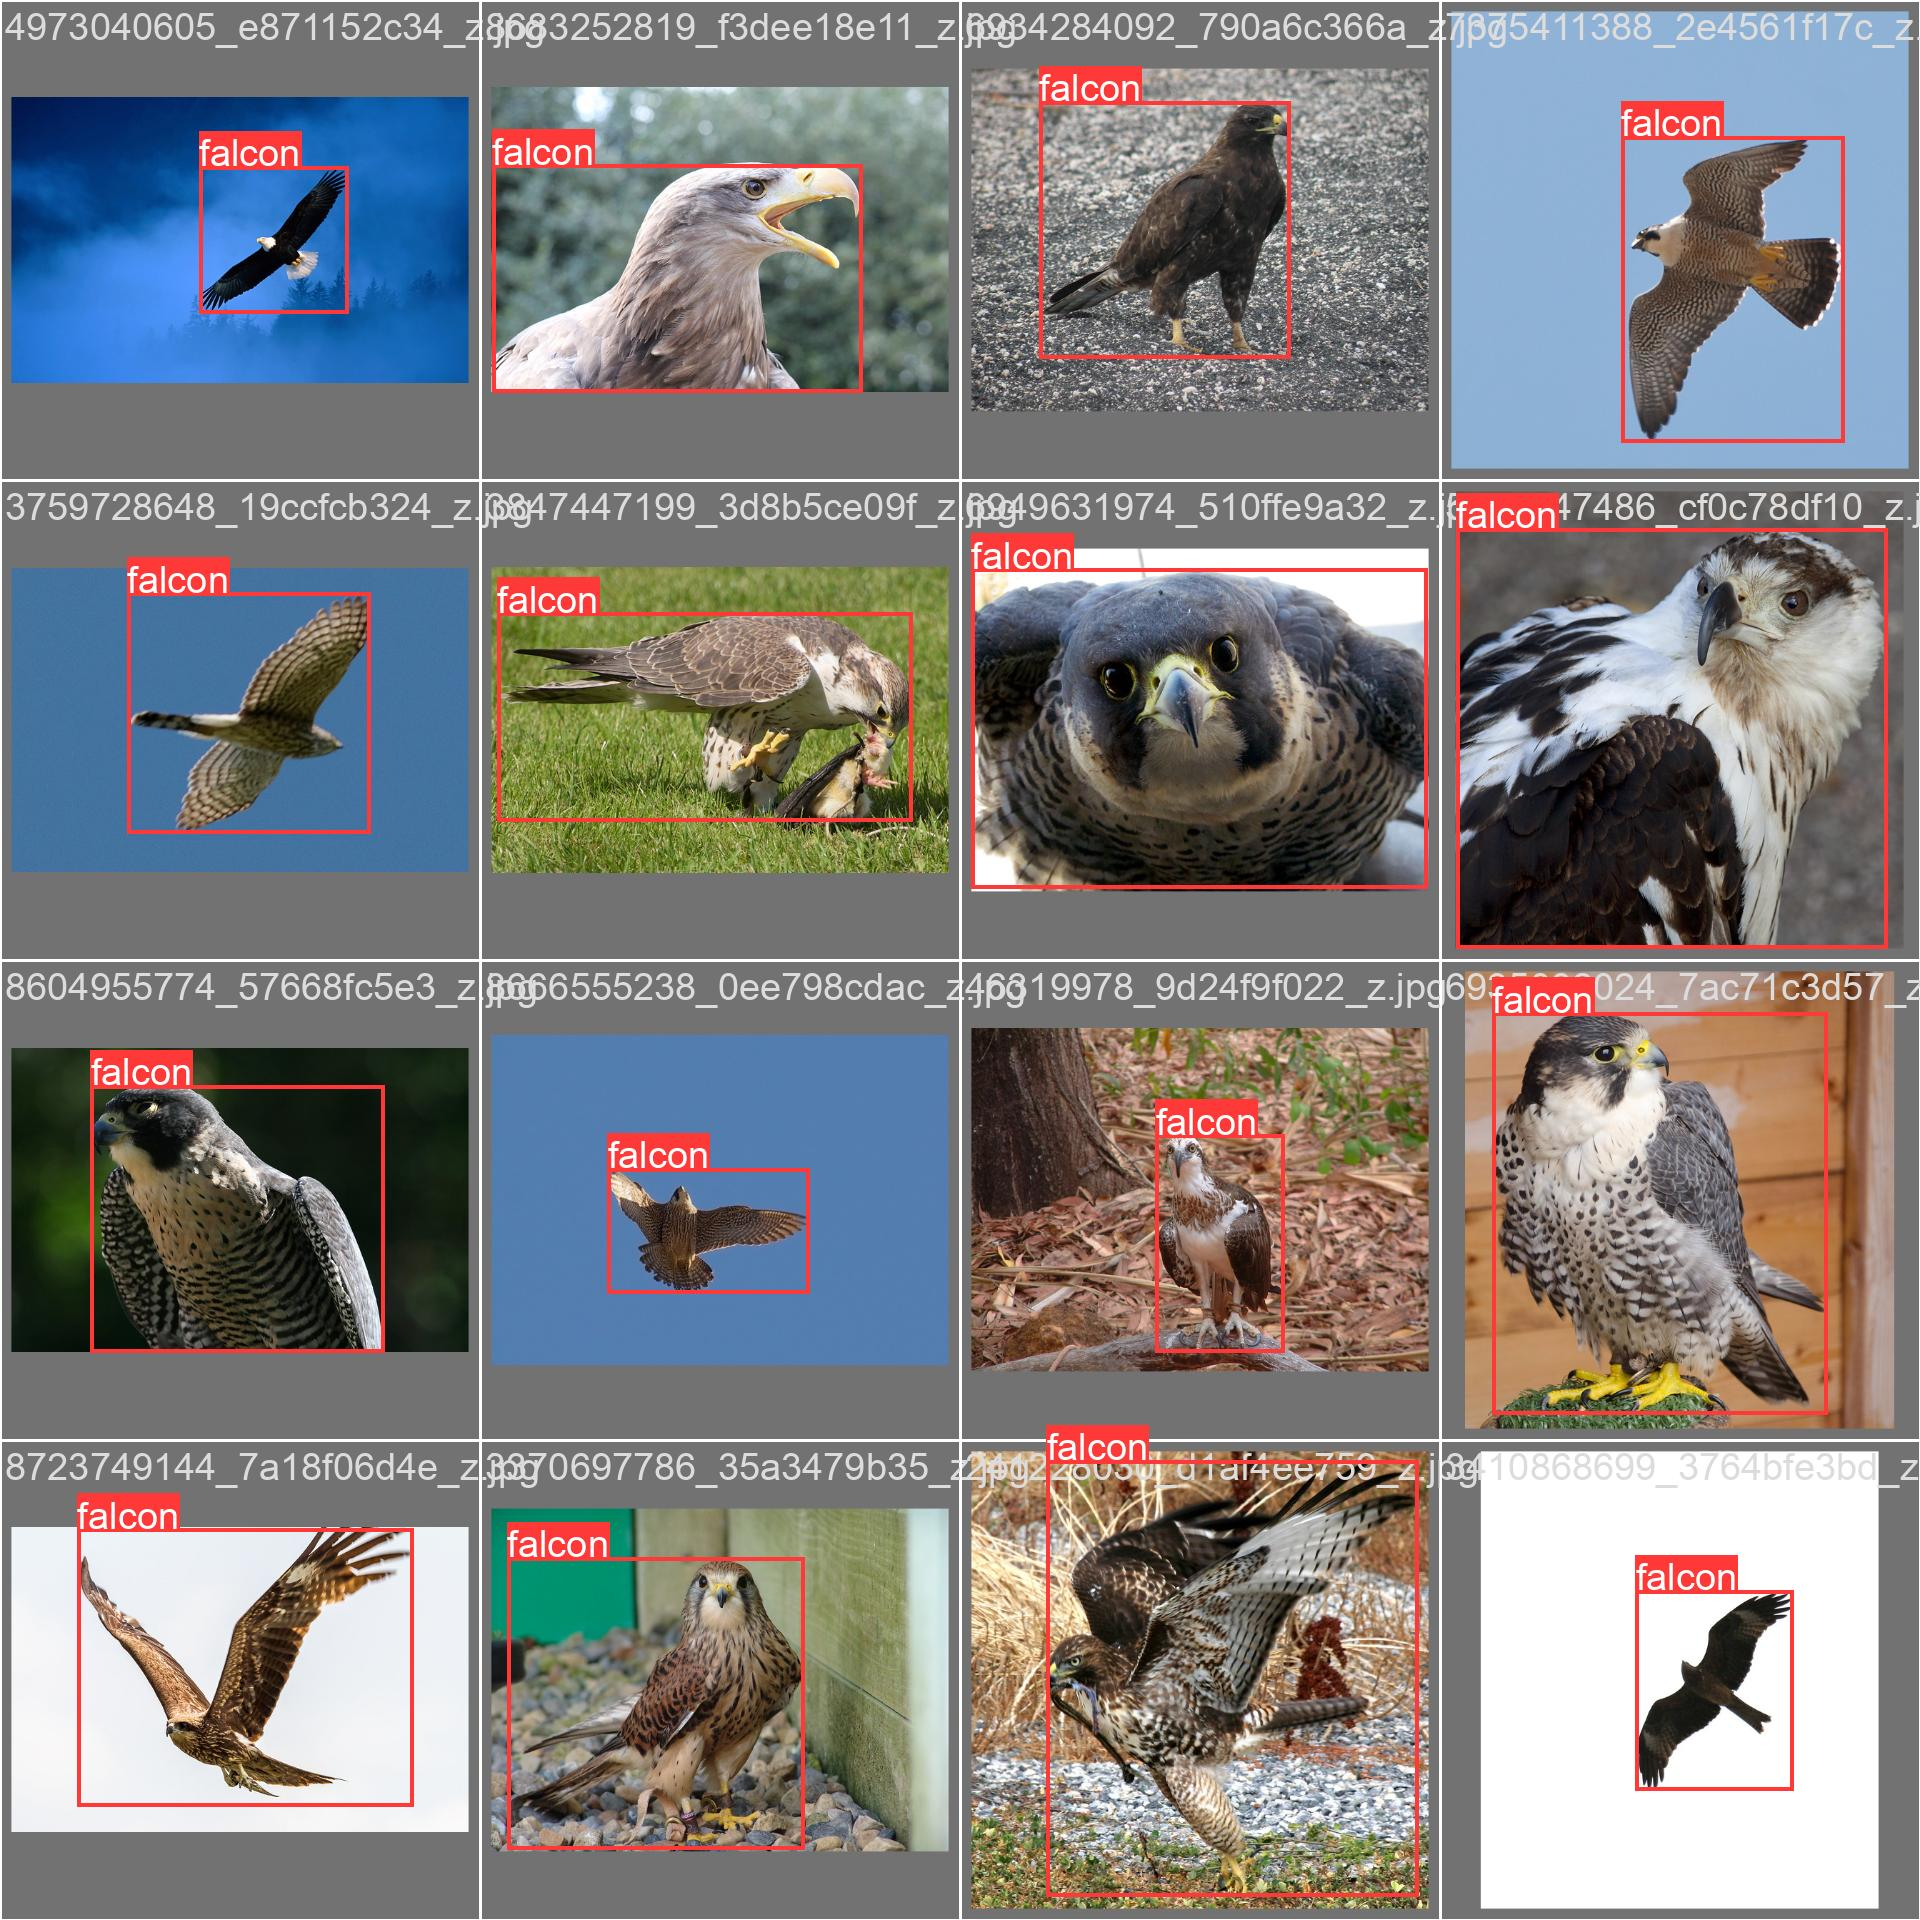

In [ ]:


Image(filename='/content/runs/detect/train/val_batch0_labels.jpg', width=800)  # train batch 0 mosaics and labels


**4.2. Training results**

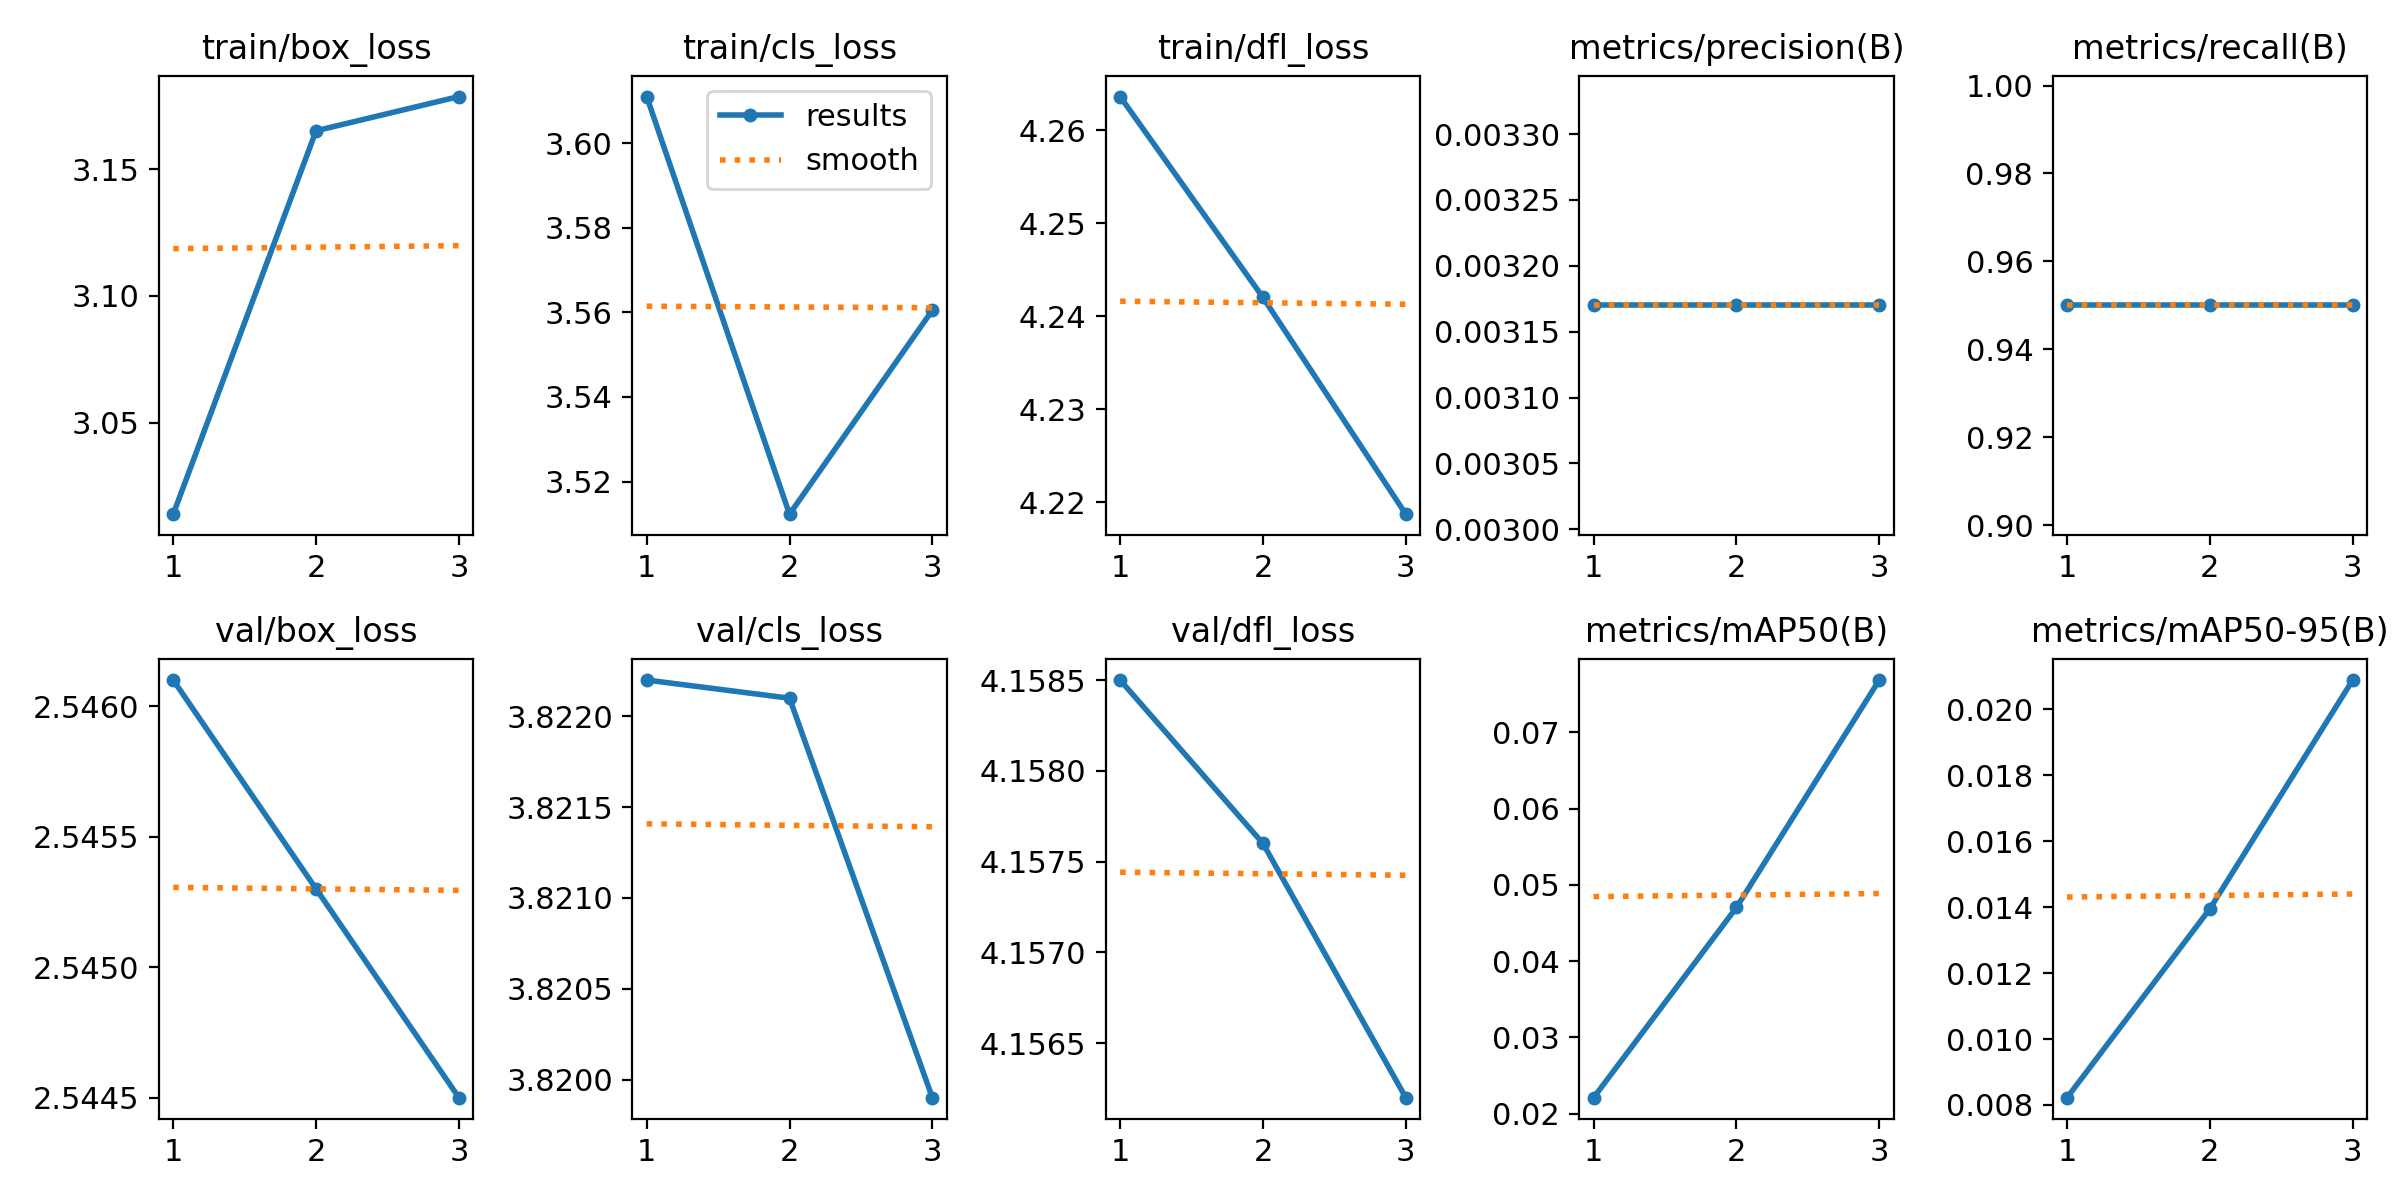

In [ ]:
Image(filename='/content/runs/detect/train/results.png', width=800)

**4.1. Correlograma in the Context of Machine Learning Representation**



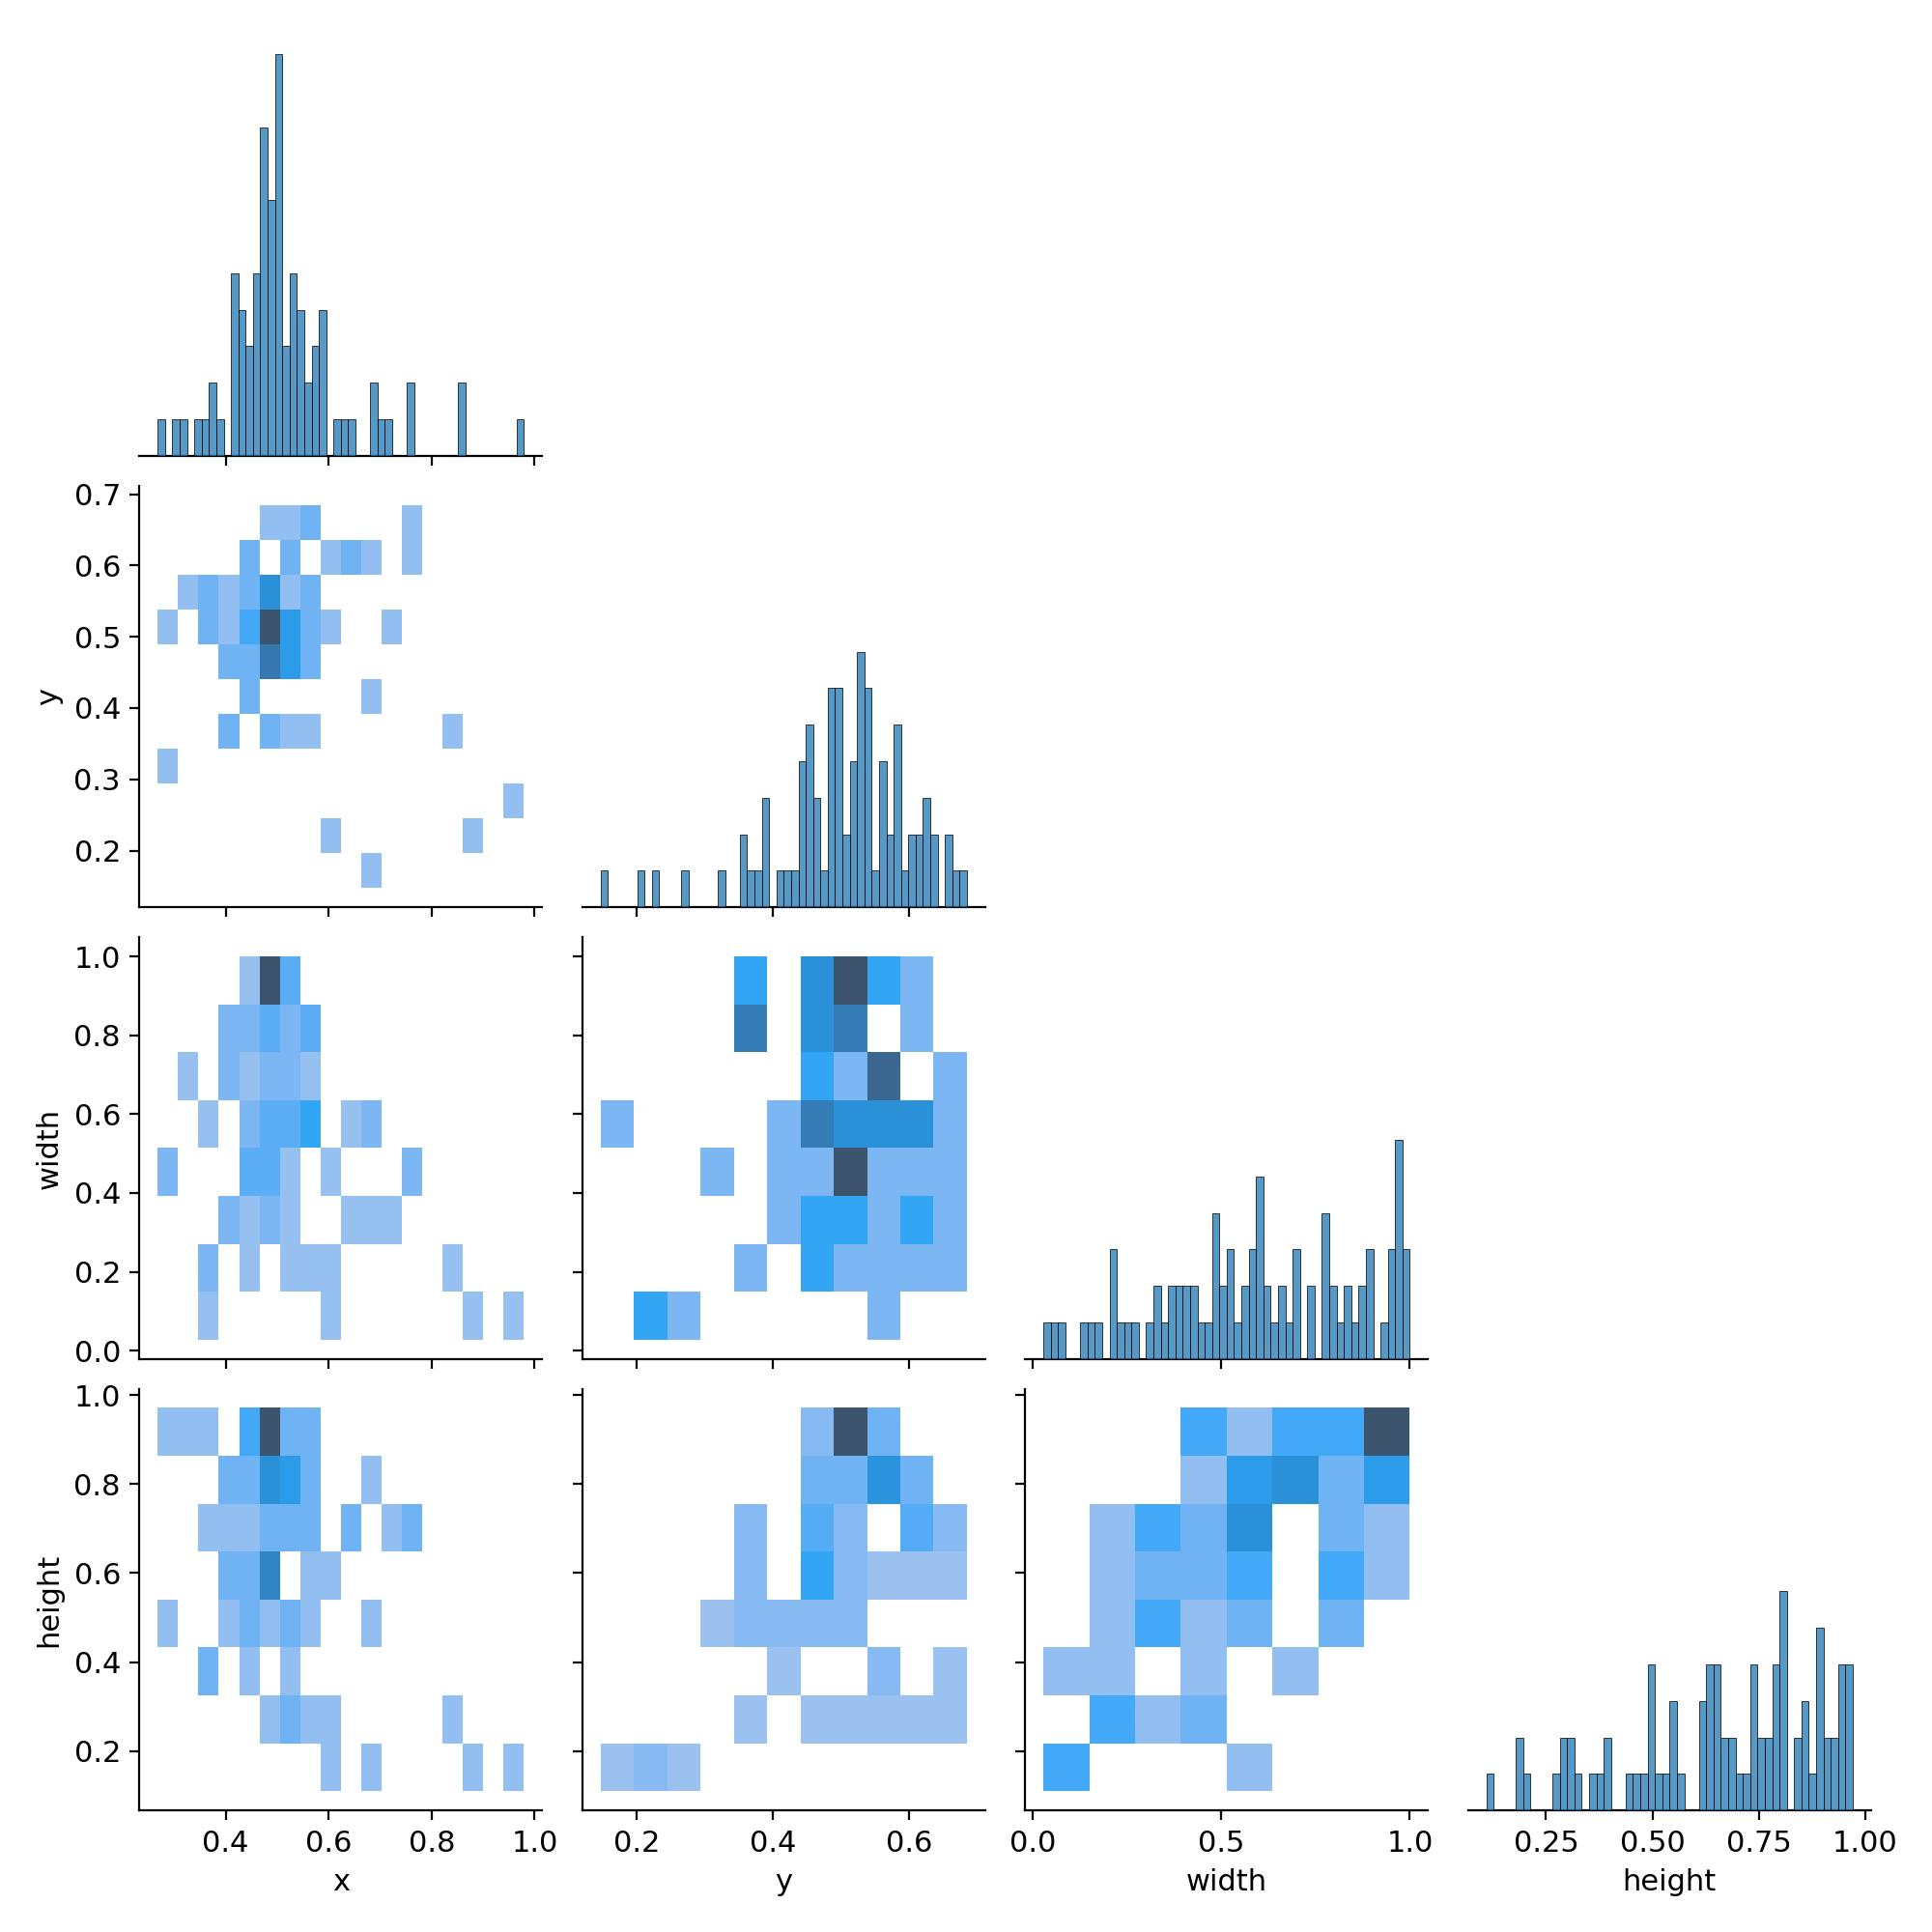

In [ ]:
Image(filename='/content/runs/detect/train/labels_correlogram.jpg', width=800)

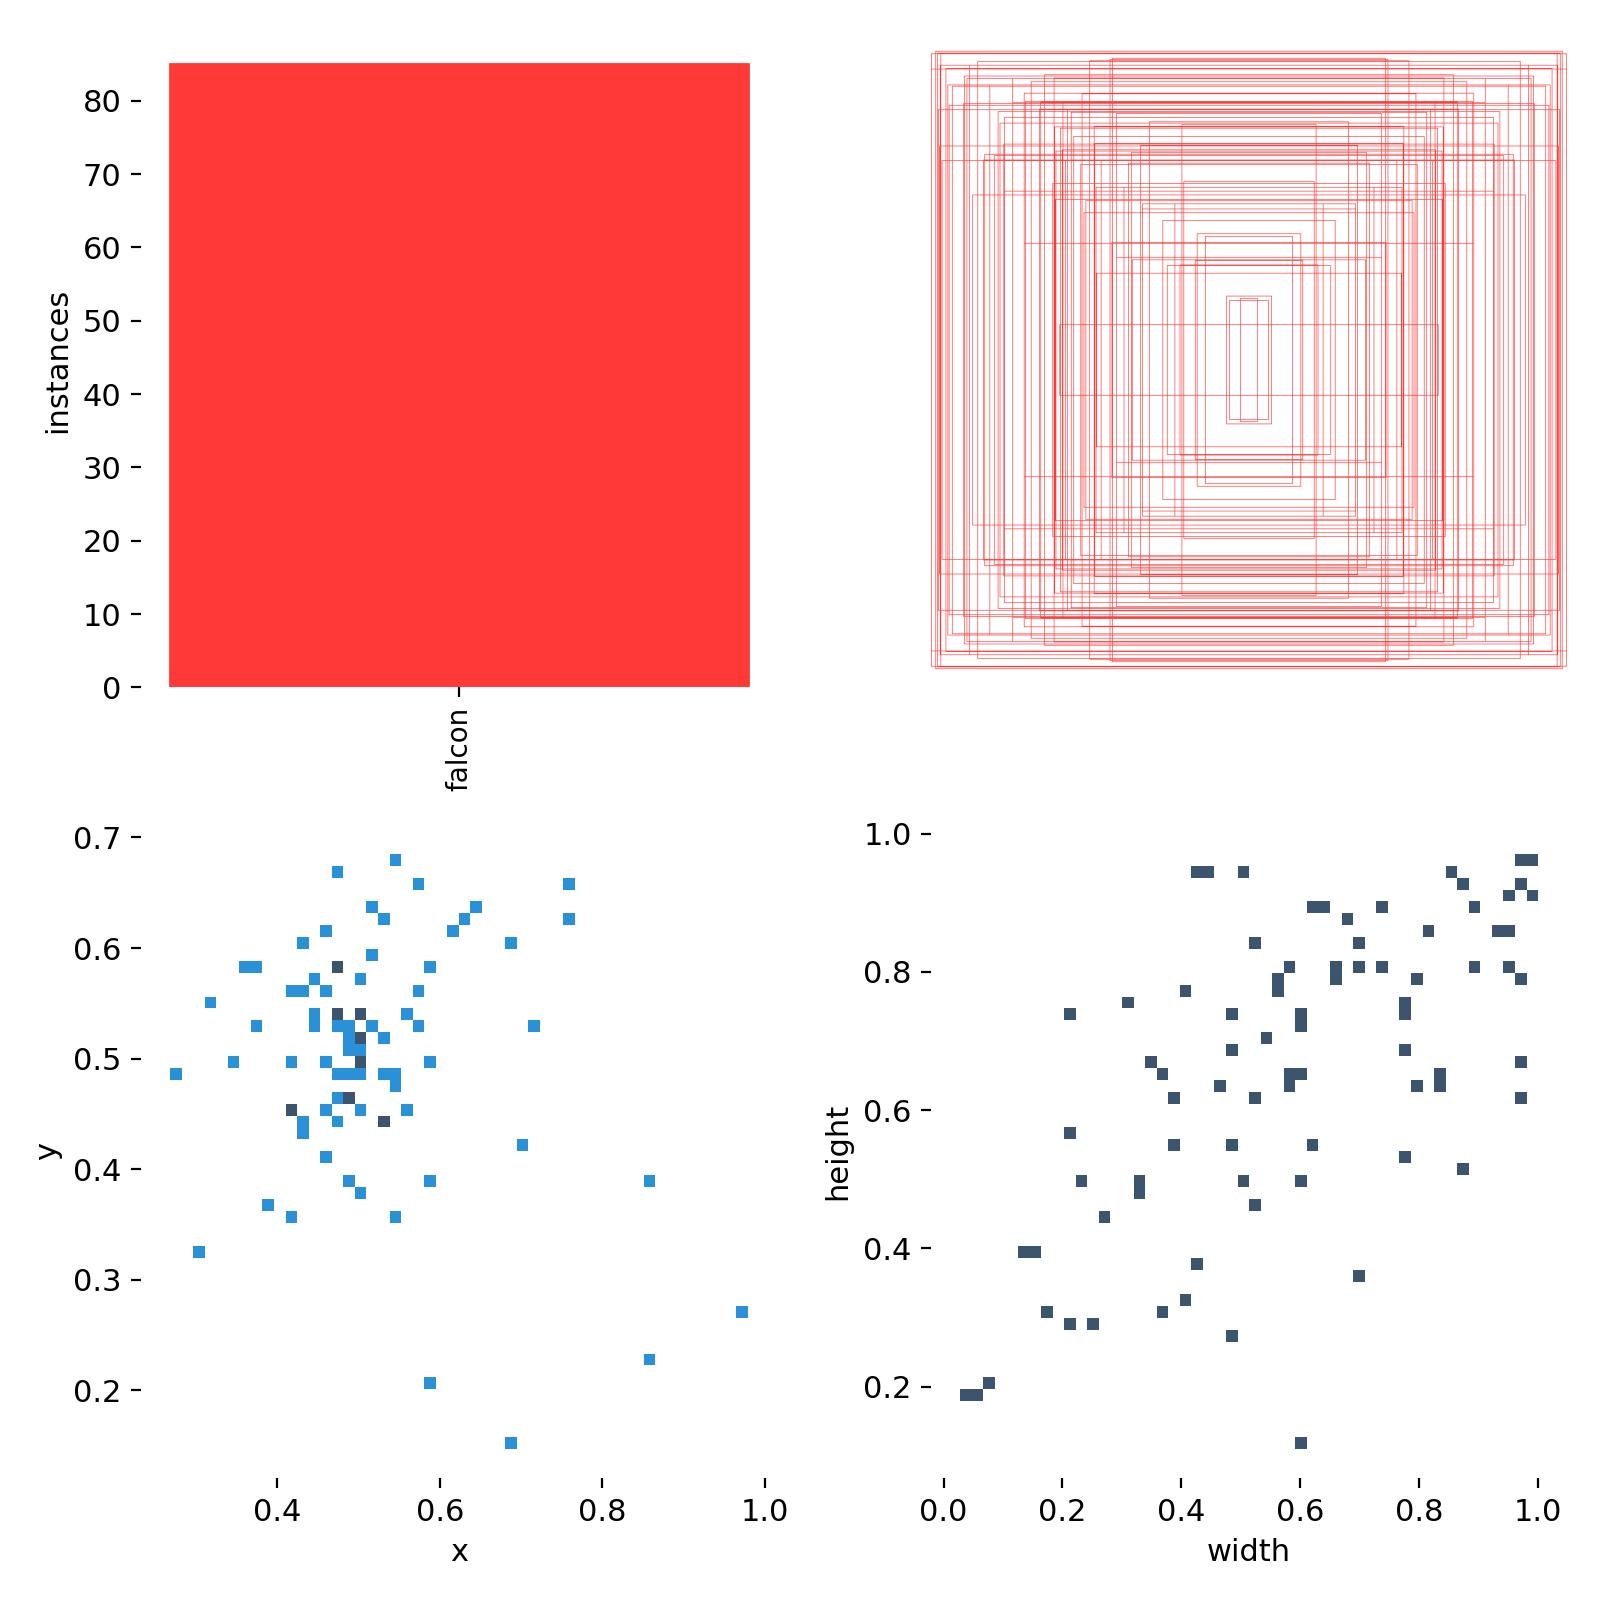

In [ ]:
Image(filename='/content/runs/detect/train/labels.jpg', width=800)

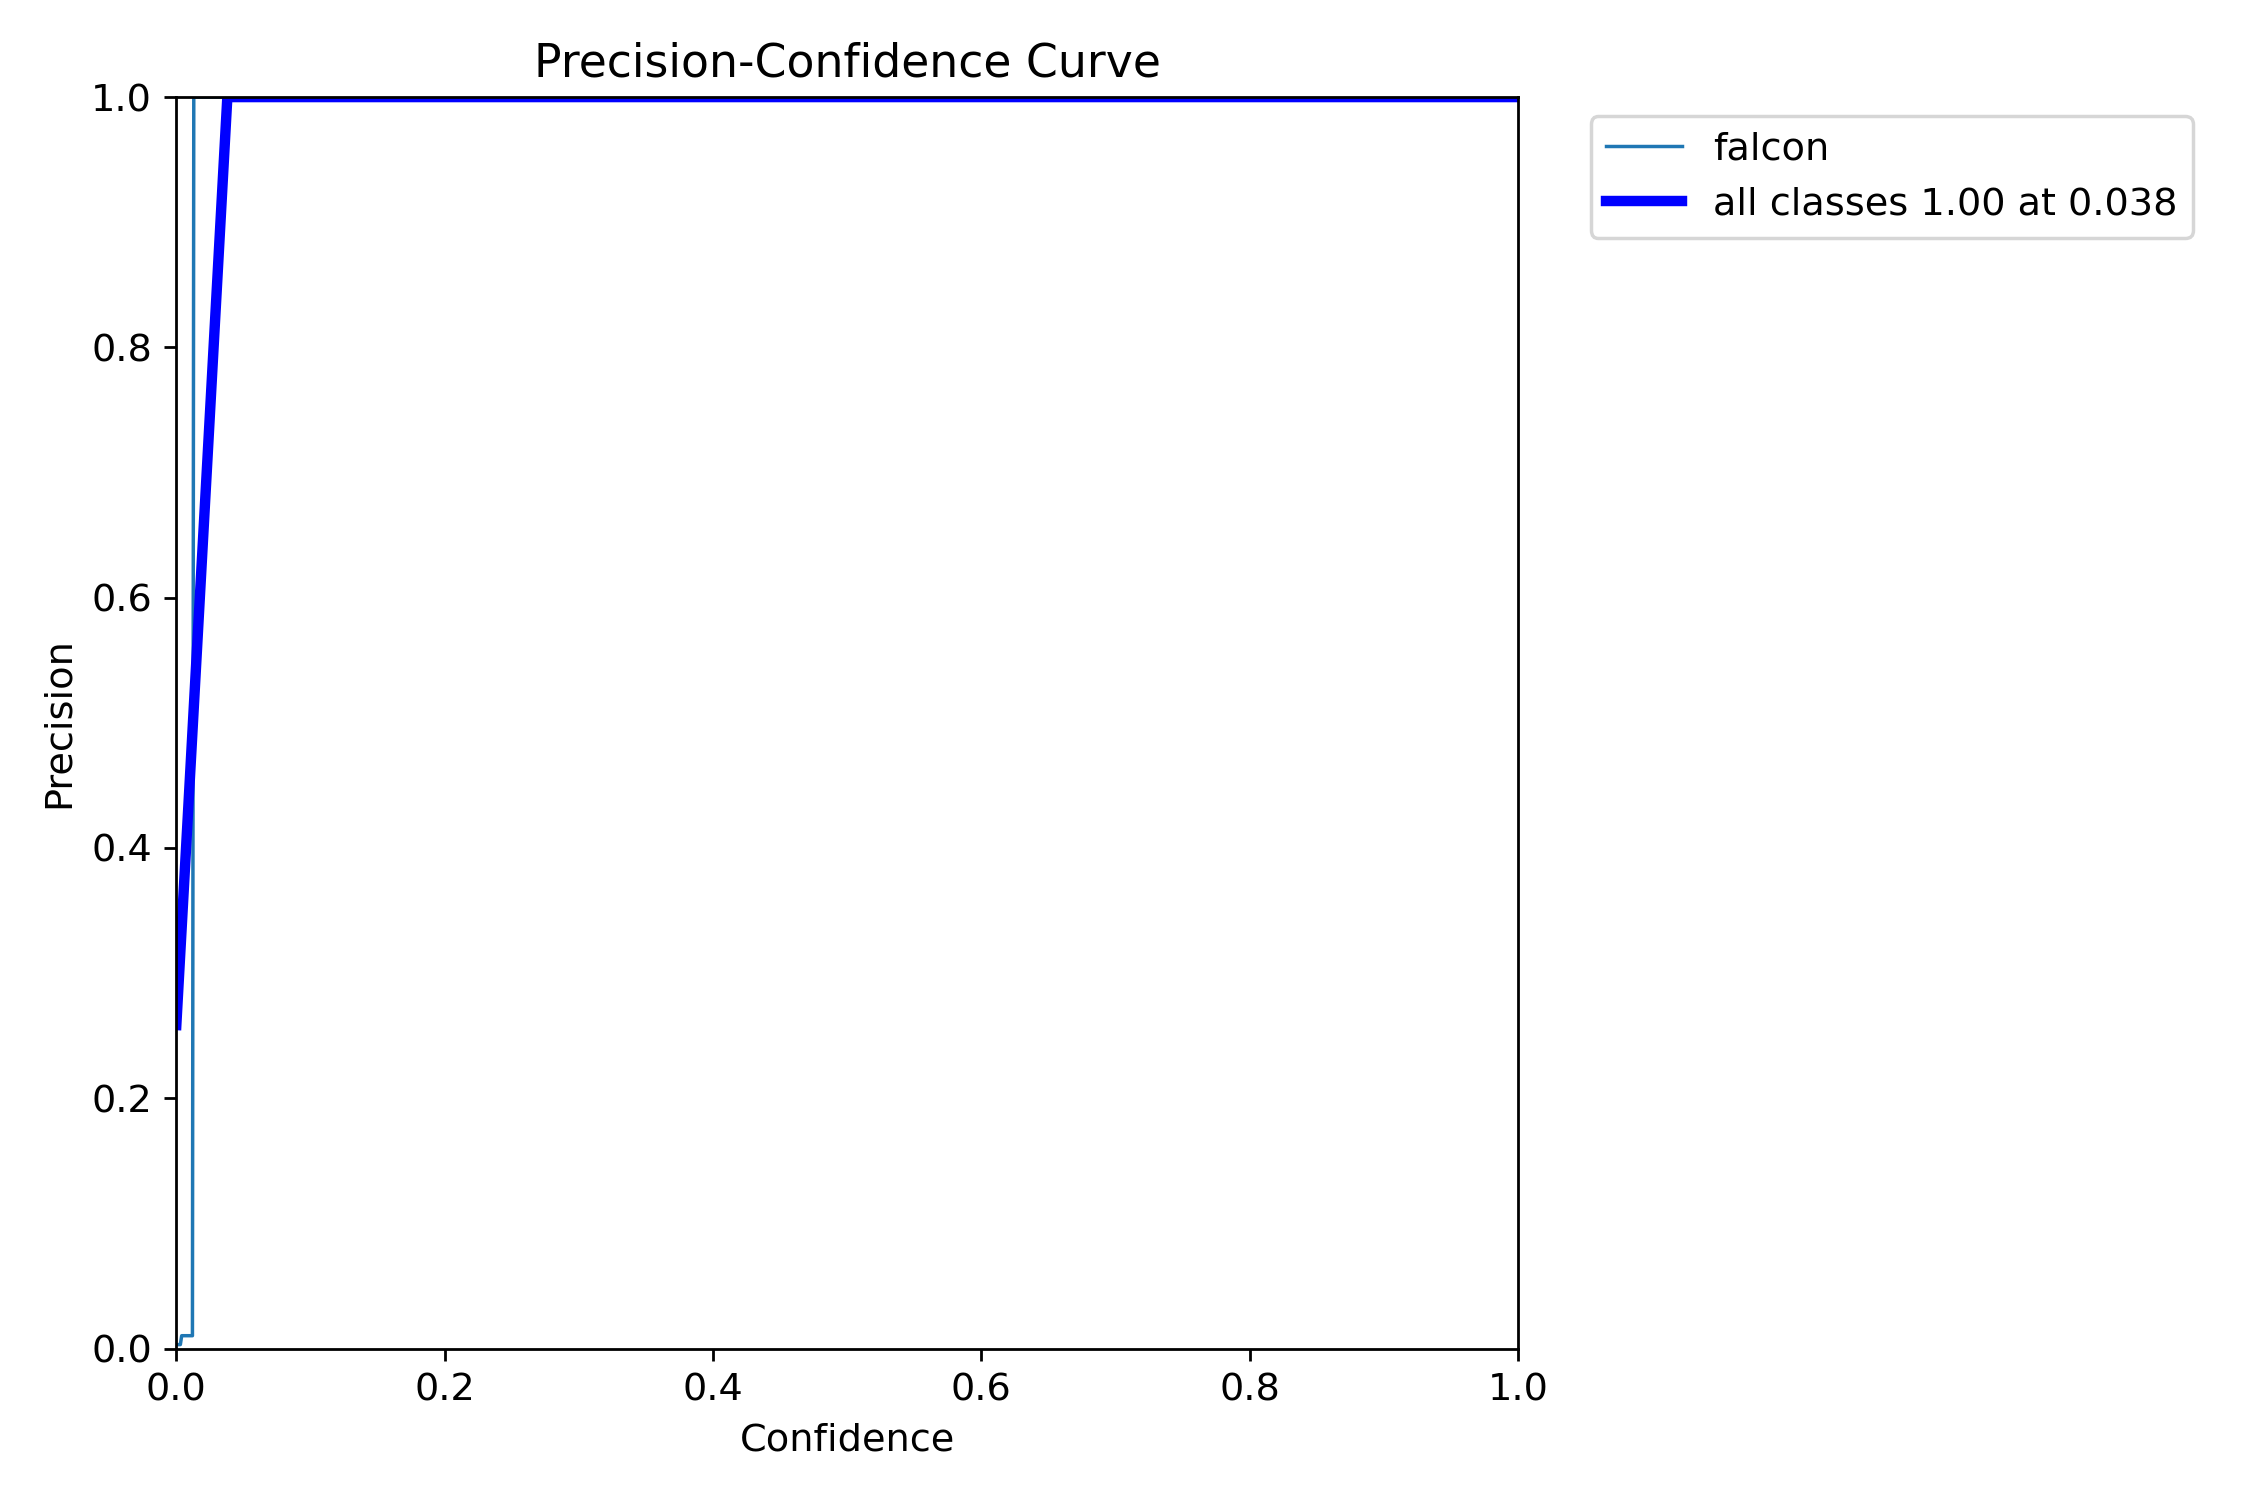

In [ ]:
Image(filename='/content/runs/detect/train/P_curve.png', width=800)

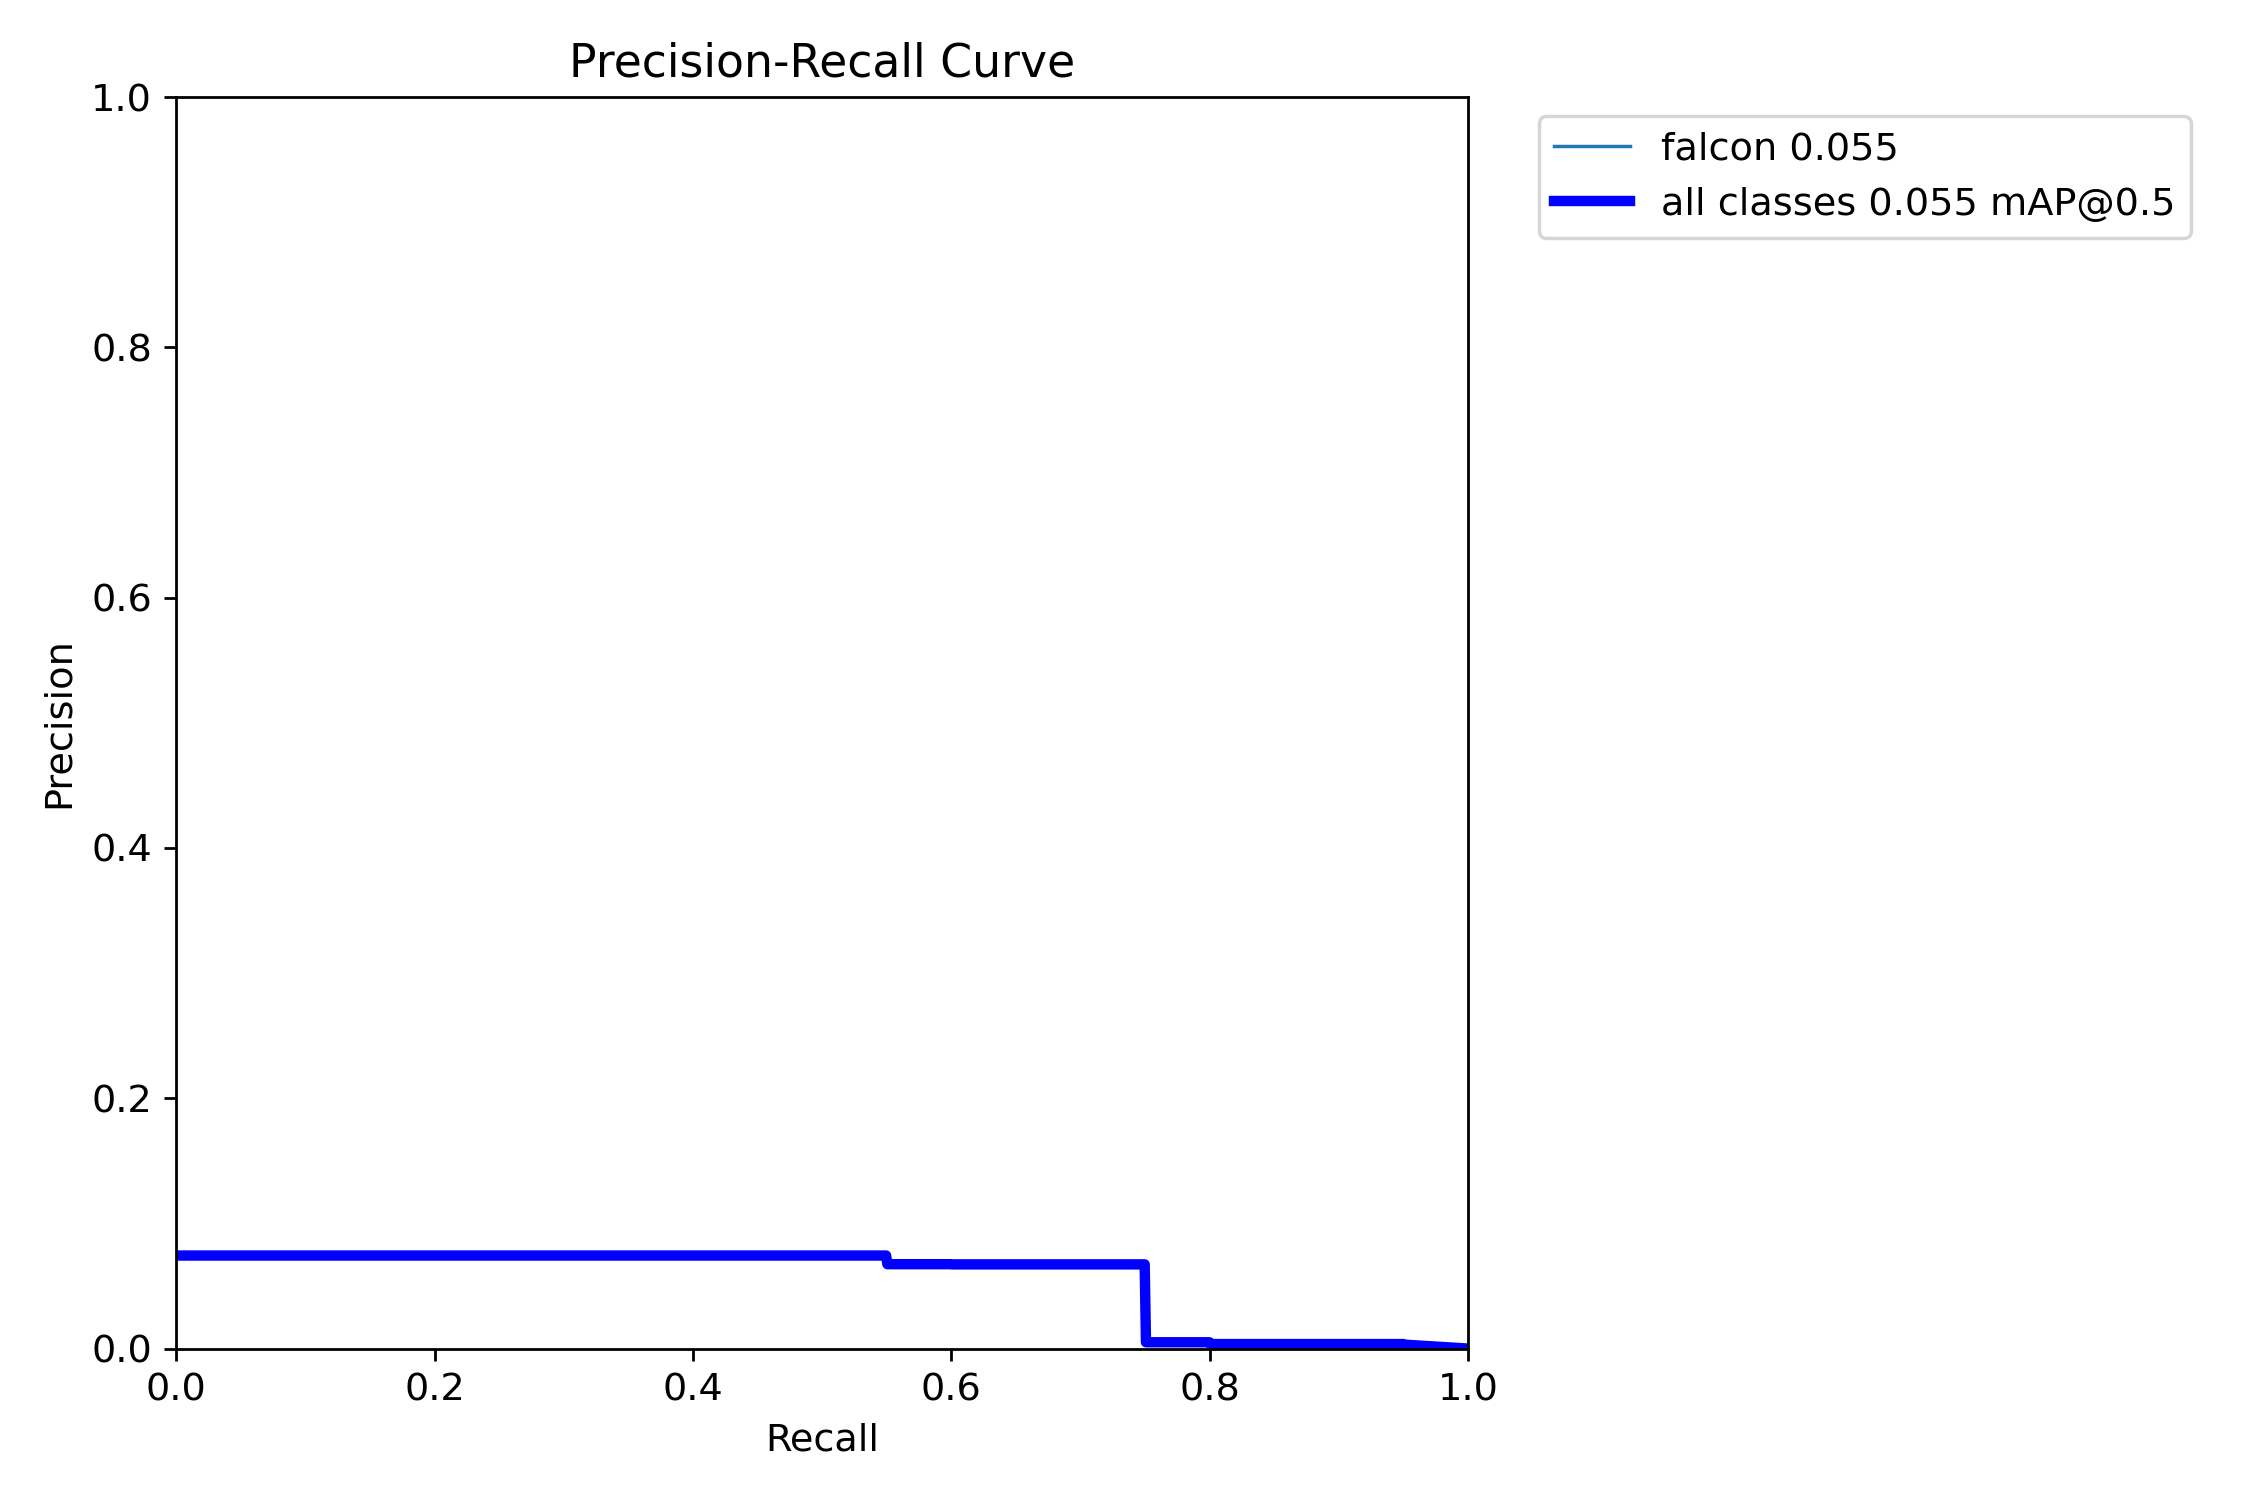

In [ ]:
Image(filename='/content/runs/detect/train/PR_curve.png', width=800)

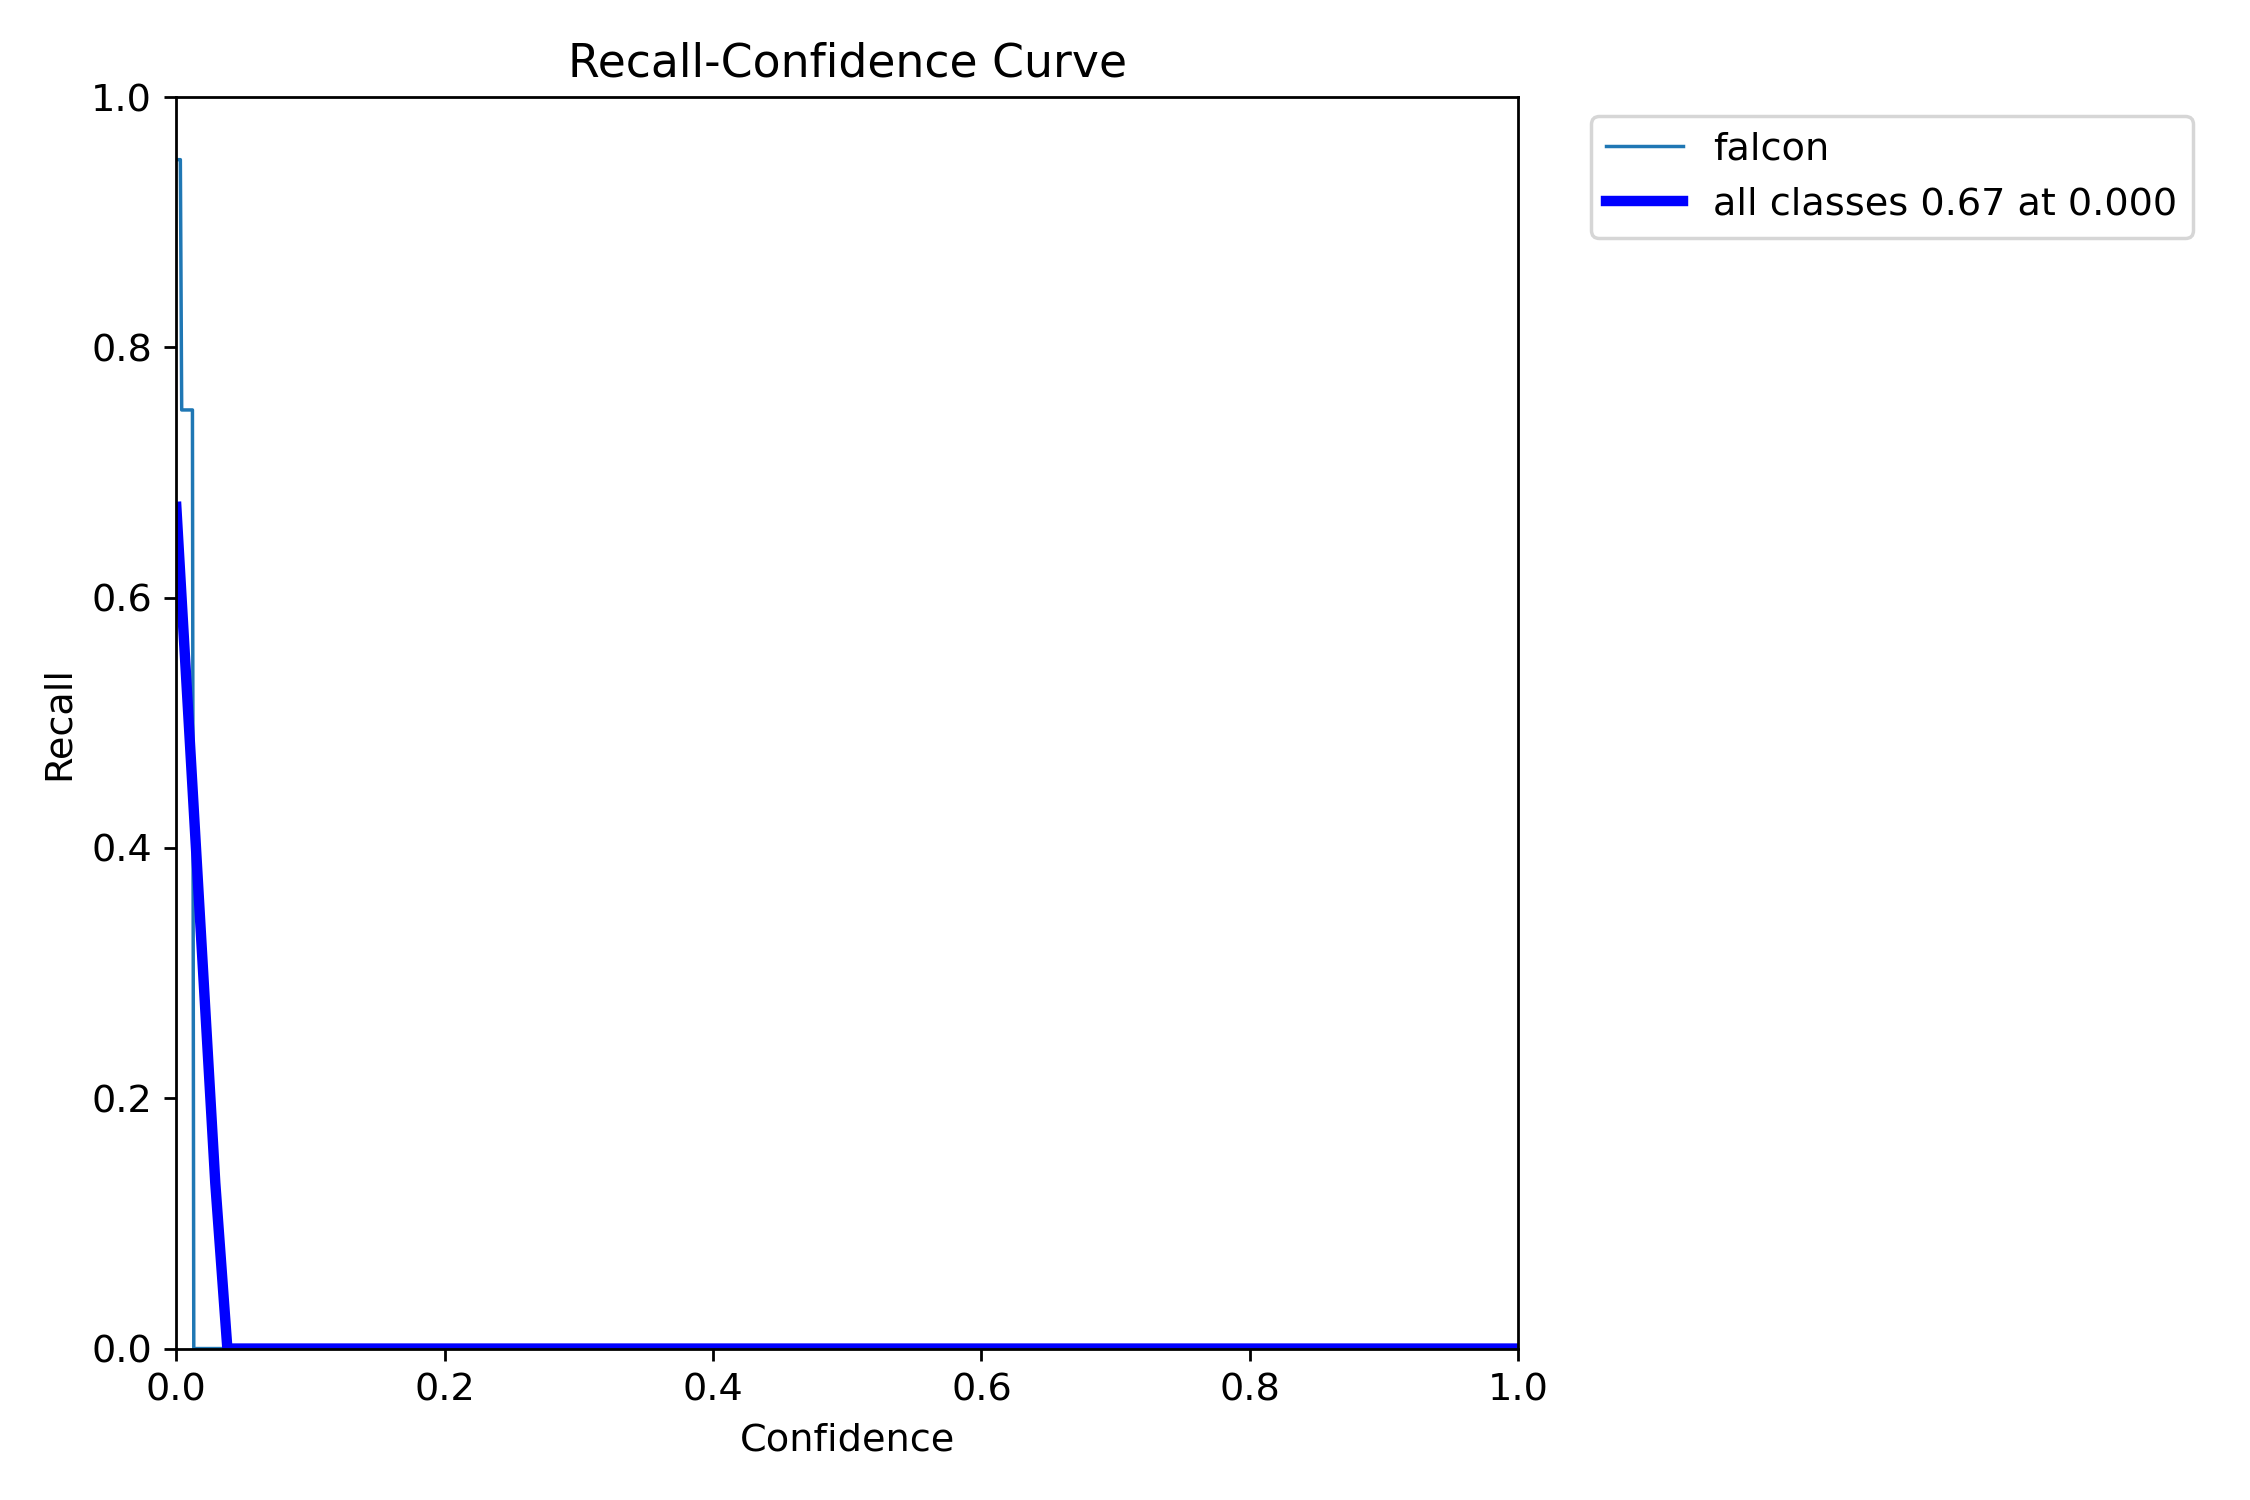

In [ ]:
Image(filename='/content/runs/detect/train/R_curve.png', width=800)